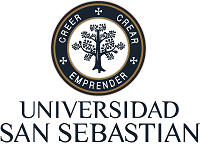

## MAGÍSTER EN DATA SCIENCE
### CURSO: MACHINE LEARNING
### TRABAJO INDIVIDUAL 2
#### DIEGO MIRANDA OLAVARRÍA

* DATASET: WINE
* El siguiente trabajo tiene como objetivo comparar diferentes algoritmos de regresión y clasificación tales como: Decision Tree Regressor, Random Forest Regressor, Support Vector Regressor y XGBoost.El método de comparación será mediante su Error Cuadrático Medio (MSE), el cuál determinará que algoritmo tiene mayor rendimiento en la predicción. El dataset utilizado es 'Wine', cuyo objetivo es predecir la calidad de distintas variedades de vinos

In [1]:
from sklearn import datasets

### Carga del Dataset

In [2]:
data = datasets.load_wine()
X = data.data
y = data.target

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV


# Preprocesamiento de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Datos de entrenamiento estandarizados
X_test = sc.transform(X_test)


# Definir los hiperparámetros para cada algoritmo
parameters_SVR = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}
parameters_DT = {'max_depth': [None, 3, 5, 7]}
parameters_RF = {'n_estimators': [10, 50, 100], 'max_depth': [None, 3, 5, 7]}
parameters_XGB = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}

#Calculando y ajustando hiperparámetros
regressor_SVR = GridSearchCV(SVR(), parameters_SVR)
regressor_DT = GridSearchCV(DecisionTreeRegressor(), parameters_DT)
regressor_RF = GridSearchCV(RandomForestRegressor(), parameters_RF)
regressor_XGB = GridSearchCV(XGBRegressor(), parameters_XGB)

# Modelado de los conjuntos de entrenamiento
regressor_SVR.fit(X_train, y_train)
regressor_DT.fit(X_train, y_train)
regressor_RF.fit(X_train, y_train)
regressor_XGB.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de prueba
y_pred_SVR = regressor_SVR.predict(X_test)
y_pred_DT = regressor_DT.predict(X_test)
y_pred_RF = regressor_RF.predict(X_test)
y_pred_XGB = regressor_XGB.predict(X_test)

# Calcular el error medio cuadrático (MSE) para cada modelo
mse_SVR = mean_squared_error(y_test, y_pred_SVR)
mse_DT = mean_squared_error(y_test, y_pred_DT)
mse_RF = mean_squared_error(y_test, y_pred_RF)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)


print("MSE del Support Vector Regressor:", mse_SVR)
print("MSE del Decision Tree Regressor:", mse_DT)
print("MSE del Random Forest Regressor:", mse_RF)
print("MSE del XGBoost:", mse_XGB)

MSE del Support Vector Regressor: 0.02736665182350935
MSE del Decision Tree Regressor: 0.16666666666666666
MSE del Random Forest Regressor: 0.06265000000000001
MSE del XGBoost: 0.15764369980832432


### Dividir los datos entre conjunto de entrenamiento y validación

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor

### Ajustar los Hiperparámetros

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
# Definir los hiperparámetros a ajustar
parameters_DT = {'max_depth': [None, 3, 5, 7]}

# Crear el regresor de árbol de decisión
regressor_DT = DecisionTreeRegressor()

# Utilizar GridSearchCV para encontrar los mejores hiperparámetros
grid_search_DT = GridSearchCV(regressor_DT, parameters_DT, scoring='neg_mean_squared_error')
grid_search_DT.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params_DT = grid_search_DT.best_params_
best_regressor_DT = grid_search_DT.best_estimator_

### Predicciones y evaluación del modelo

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
y_pred_DT = best_regressor_DT.predict(X_test)
mse_DT = round(mean_squared_error(y_test, y_pred_DT),1)

# Mostrar el MSE obtenido
print("MSE_DT: ", mse_DT)

MSE_DT:  0.2


### Scatter Plot

In [10]:
import matplotlib.pyplot as plt

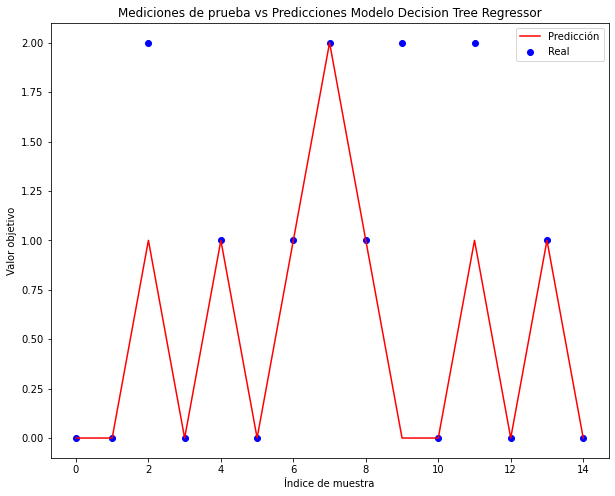

In [34]:
# Grafica las 15 primeras mediciones de prueba y las predicciones
plt.subplots(figsize=(10,8))
plt.scatter(range(15), y_test[:15], color='b', label='Real')
plt.plot(range(15), y_pred_DT[:15], color='r', label='Predicción')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor objetivo')
plt.title('Mediciones de prueba vs Predicciones Modelo Decision Tree Regressor')
plt.legend()
plt.show()

# Random Forest Reggresor

In [12]:
from sklearn.ensemble import RandomForestRegressor

### Ajustar los hiperparámetros

In [13]:
# Definir los hiperparámetros a ajustar
parameters_RF = {'n_estimators': [10, 50, 100], 'max_depth': [None, 3, 5, 7]}

# Crear el regresor de Random Forest
regressor_RF = RandomForestRegressor()

# Utilizar GridSearchCV para encontrar los mejores hiperparámetros
grid_search_RF = GridSearchCV(regressor_RF, parameters_RF, scoring='neg_mean_squared_error')
grid_search_RF.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params_RF = grid_search_RF.best_params_
best_regressor_RF = grid_search_RF.best_estimator_

### Predicciones y evaluación del modelo

In [14]:
# Evaluar el desempeño del modelo en el conjunto de prueba
y_pred_RF = best_regressor_RF.predict(X_test)
mse_RF = round(mean_squared_error(y_test, y_pred_RF),1)

# Mostrar el MSE obtenido
print("MSE_RF: ", mse_RF)

MSE_RF:  0.1


### Muestra gráfica

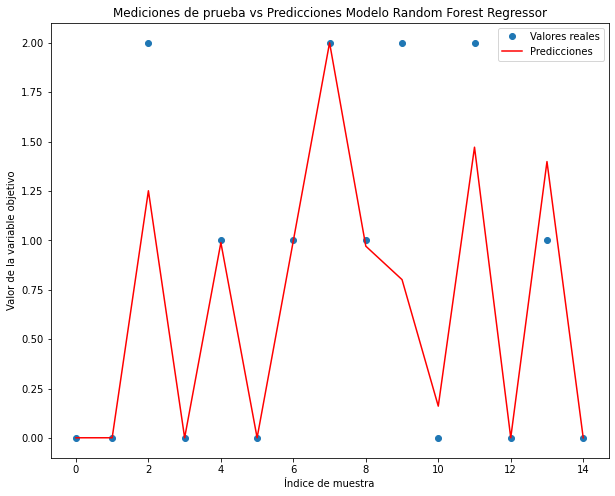

In [35]:
# Graficar las 15 primeras mediciones de prueba y sus predicciones
plt.subplots(figsize=(10,8))
plt.plot(y_test[:15], 'o', label='Valores reales')
plt.plot(y_pred_RF[:15], 'r-', label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de la variable objetivo')
plt.title('Mediciones de prueba vs Predicciones Modelo Random Forest Regressor')
plt.legend()
plt.show()

# Support Vector Regressor

In [16]:
from sklearn.svm import SVR

### Definición del modelo

In [17]:
# Definir los hiperparámetros a ajustar
parameters_SVR = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}

# Crear el regresor SVR
regressor_SVR = SVR()

# Utilizar GridSearchCV para encontrar los mejores hiperparámetros
grid_search_SVR = GridSearchCV(regressor_SVR, parameters_SVR, scoring='neg_mean_squared_error')
grid_search_SVR.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo ajustado
best_params_SVR = grid_search_SVR.best_params_
best_regressor_SVR = grid_search_SVR.best_estimator_

### Predicciones y evaluación del modelo

In [18]:
# Evaluar el desempeño del modelo en el conjunto de prueba
y_pred_SVR = best_regressor_SVR.predict(X_test)
mse_SVR = round(mean_squared_error(y_test, y_pred_SVR),1)

# Mostrar el MSE obtenido
print("MSE_SVR: ", mse_SVR)

MSE_SVR:  0.2


### Muestra gráfica

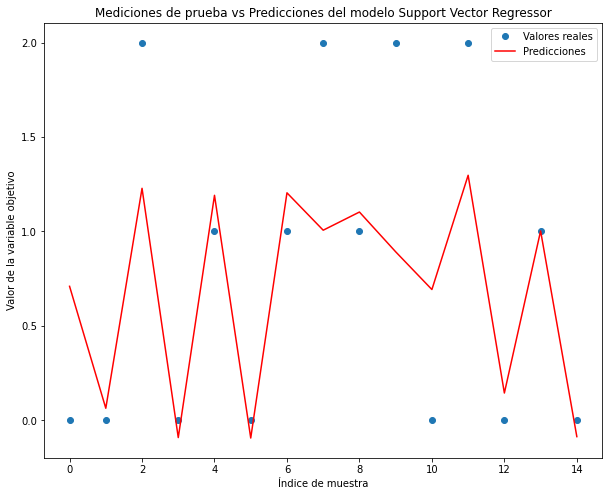

In [37]:
# Graficar las 15 primeras mediciones de prueba y sus predicciones
plt.subplots(figsize=(10,8))
plt.plot(y_test[:15], 'o', label='Valores reales')
plt.plot(y_pred_SVR[:15], 'r-', label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de la variable objetivo')
plt.title('Mediciones de prueba vs Predicciones del modelo Support Vector Regressor')
plt.legend()
plt.show()

# XGBOOST

In [20]:
import xgboost as xgb

### Definir los hiperparámetros

In [21]:
# Definir los hiperparámetros a ajustar para XGBoost
parameters_xgb = {'max_depth': [None, 1,2],
                  'learning_rate': [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.99,0.09,0.08,0.07,0.06],
                  'n_estimators': [150, 200,250,350]}

### Crear el regresor de XGBoost

In [22]:
regressor_xgb = xgb.XGBRegressor()

### Encontrar los mejores hiperparámetros con GridSearchCV

In [23]:
grid_search_xgb = GridSearchCV(regressor_xgb, parameters_xgb, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
           

### Obtener los mejores hiperparámetros

In [24]:
best_params_xgb = grid_search_xgb.best_params_
print(best_params_xgb)
best_regressor_xgb = grid_search_xgb.best_estimator_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 250}


### Predicciones y evaluación del modelo

In [25]:
y_pred_xgb = best_regressor_xgb.predict(X_test)
mse_xgb = round(mean_squared_error(y_test, y_pred_xgb),1)

print("MSE de XGBoost:", mse_xgb)

MSE de XGBoost: 0.0


### Muestra gráfica

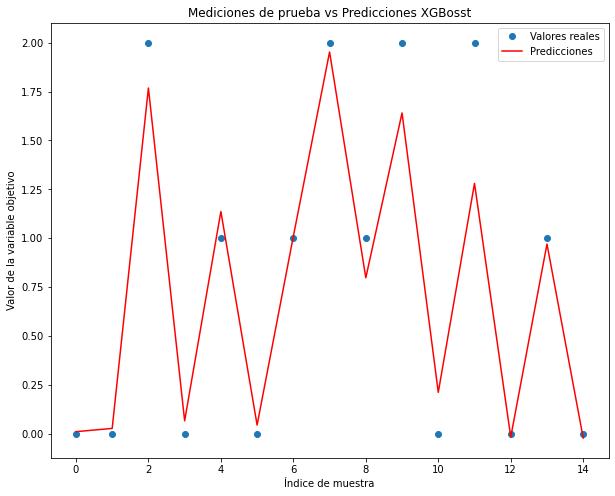

In [36]:
# Graficar las 15 primeras mediciones de prueba y sus predicciones
plt.subplots(figsize=(10,8))
plt.plot(y_test[:15], 'o', label='Valores reales')
plt.plot(y_pred_xgb[:15], 'r-', label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de la variable objetivo')
plt.title('Mediciones de prueba vs Predicciones XGBosst')
plt.legend()
plt.show()

# Comparación entre los modelos

In [27]:
# Mostrar los MSE obtenidos para cada modelo
mse_values = {'Modelo': ['Decision Tree', 'Random Forest', 'SVR','xgb'],
              'MSE': [mse_DT, mse_RF, mse_SVR, mse_xgb]}

print("MSE Decision Tree Regressor:", mse_DT)
print("MSE Random Forest Regressor Regressor:", mse_RF)
print("MSE Support Vector Regressor Regressor:", mse_SVR)
print("MSE XGBoost:", mse_xgb)

MSE Decision Tree Regressor: 0.2
MSE Random Forest Regressor Regressor: 0.1
MSE Support Vector Regressor Regressor: 0.2
MSE XGBoost: 0.0


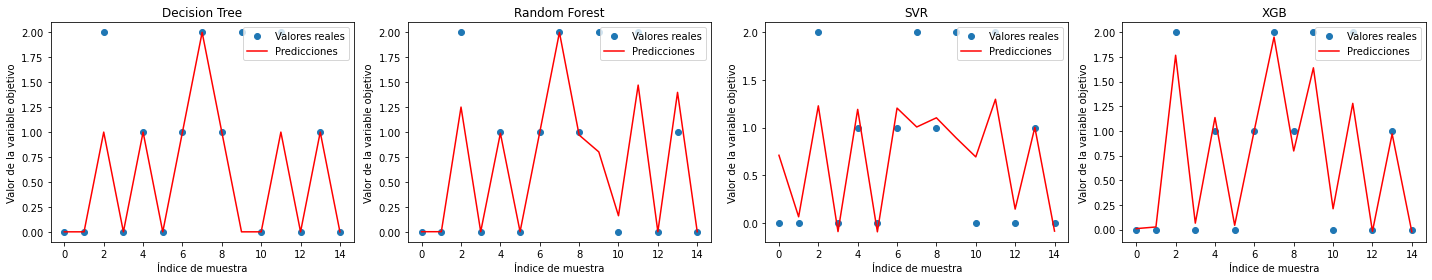

In [28]:
# Graficar las 15 primeras mediciones de prueba y sus predicciones para cada modelo
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
plt.plot(y_test[:15], 'o', label='Valores reales')
plt.plot(y_pred_DT[:15], 'r-', label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de la variable objetivo')
plt.title('Decision Tree')
plt.legend()

 

plt.subplot(1, 4, 2)
plt.plot(y_test[:15], 'o', label='Valores reales')
plt.plot(y_pred_RF[:15], 'r-', label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de la variable objetivo')
plt.title('Random Forest')
plt.legend()

 

plt.subplot(1, 4, 3)
plt.plot(y_test[:15], 'o', label='Valores reales')
plt.plot(y_pred_SVR[:15], 'r-', label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de la variable objetivo')
plt.title('SVR')
plt.legend()

 

plt.subplot(1, 4, 4)
plt.plot(y_test[:15], 'o', label='Valores reales')
plt.plot(y_pred_xgb[:15], 'r-', label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de la variable objetivo')
plt.title('XGB')
plt.legend()
plt.tight_layout()
plt.show()

### Definición de las medidas de posición

In [29]:
import numpy as np

In [30]:
# Ajustar los modelos con todos los datos
regressor_SVR.fit(X, y)
regressor_DT.fit(X, y)
regressor_RF.fit(X, y)
regressor_xgb.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [31]:
media = np.mean(X, axis=0)  # Media
mediana = np.median(X, axis=0)  # Mediana
primer_cuartil = np.percentile(X, 25, axis=0)  # Primer Cuartil
segundo_quintil = np.percentile(X, 40, axis=0)  # Segundo Quintil
tercer_quintil = np.percentile(X, 60, axis=0)  # Tercer Quintil
tercer_cuartil = np.percentile(X, 75, axis=0)  # Tercer Cuartil

In [32]:
pred_media_SVR = regressor_SVR.predict([media])
pred_mediana_SVR = regressor_SVR.predict([mediana])
pred_primer_cuartil_SVR = regressor_SVR.predict([primer_cuartil])
pred_segundo_quintil_SVR = regressor_SVR.predict([segundo_quintil])
pred_tercer_quintil_SVR = regressor_SVR.predict([tercer_quintil])
pred_tercer_cuartil_SVR = regressor_SVR.predict([tercer_cuartil])

pred_media_DT = regressor_DT.predict([media])
pred_mediana_DT = regressor_DT.predict([mediana])
pred_primer_cuartil_DT = regressor_DT.predict([primer_cuartil])
pred_segundo_quintil_DT = regressor_DT.predict([segundo_quintil])
pred_tercer_quintil_DT = regressor_DT.predict([tercer_quintil])
pred_tercer_cuartil_DT = regressor_DT.predict([tercer_cuartil])

pred_media_RF = regressor_RF.predict([media])
pred_mediana_RF = regressor_RF.predict([mediana])
pred_primer_cuartil_RF = regressor_RF.predict([primer_cuartil])
pred_segundo_quintil_RF = regressor_RF.predict([segundo_quintil])
pred_tercer_quintil_RF = regressor_RF.predict([tercer_quintil])
pred_tercer_cuartil_RF = regressor_RF.predict([tercer_cuartil])

pred_media_XGB = regressor_xgb.predict([media])
pred_mediana_XGB = regressor_xgb.predict([mediana])
pred_primer_cuartil_XGB = regressor_xgb.predict([primer_cuartil])
pred_segundo_quintil_XGB = regressor_xgb.predict([segundo_quintil])
pred_tercer_quintil_XGB = regressor_xgb.predict([tercer_quintil])
pred_tercer_cuartil_XGB = regressor_xgb.predict([tercer_cuartil])


# Gráfica de comparación 

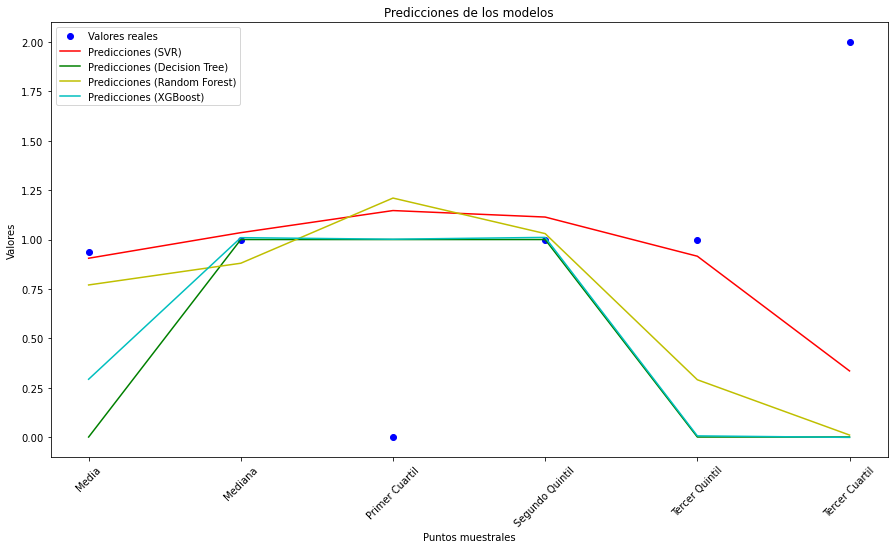

In [33]:
import matplotlib.pyplot as plt


# Define los puntos muestrales
puntos_muestrales = ['Media', 'Mediana', 'Primer Cuartil', 'Segundo Quintil', 'Tercer Quintil', 'Tercer Cuartil']

# Predicciones de cada punto muestral
predicciones_SVR = [pred_media_SVR[0], pred_mediana_SVR[0], pred_primer_cuartil_SVR[0],
                    pred_segundo_quintil_SVR[0], pred_tercer_quintil_SVR[0], pred_tercer_cuartil_SVR[0]]

predicciones_DT = [pred_media_DT[0], pred_mediana_DT[0], pred_primer_cuartil_DT[0],
                   pred_segundo_quintil_DT[0], pred_tercer_quintil_DT[0], pred_tercer_cuartil_DT[0]]

predicciones_RF = [pred_media_RF[0], pred_mediana_RF[0], pred_primer_cuartil_RF[0],
                   pred_segundo_quintil_RF[0], pred_tercer_quintil_RF[0], pred_tercer_cuartil_RF[0]]

predicciones_XGB = [pred_media_XGB[0], pred_mediana_XGB[0], pred_primer_cuartil_XGB[0],
                    pred_segundo_quintil_XGB[0], pred_tercer_quintil_XGB[0], pred_tercer_cuartil_XGB[0]]

# Lista con valores reales
valores_reales = [np.mean(y), np.median(y), np.percentile(y, 25), np.percentile(y, 40), np.percentile(y, 60), np.percentile(y, 75)]


plt.figure(figsize=(15, 8))
plt.plot(range(len(puntos_muestrales)), valores_reales, 'bo', label='Valores reales')
plt.plot(range(len(puntos_muestrales)), predicciones_SVR, 'r-', label='Predicciones (SVR)')
plt.plot(range(len(puntos_muestrales)), predicciones_DT, 'g-', label='Predicciones (Decision Tree)')
plt.plot(range(len(puntos_muestrales)), predicciones_RF, 'y-', label='Predicciones (Random Forest)')
plt.plot(range(len(puntos_muestrales)), predicciones_XGB, 'c-', label='Predicciones (XGBoost)')
plt.xticks(range(len(puntos_muestrales)), puntos_muestrales, rotation=45)
plt.xlabel('Puntos muestrales')
plt.ylabel('Valores')
plt.title('Predicciones de los modelos')
plt.legend()
plt.show()